In [73]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [74]:
#load dataset
loan_df = pd.read_csv('loan_data.csv')
#display top 5 rows
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [75]:
#check for datatypes of columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [76]:
#check for missing values
print(loan_df.isnull().sum())
#check for duplicate records
print(loan_df.duplicated().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
0


Text(0.5, 1.0, 'Distribution of Approvals')

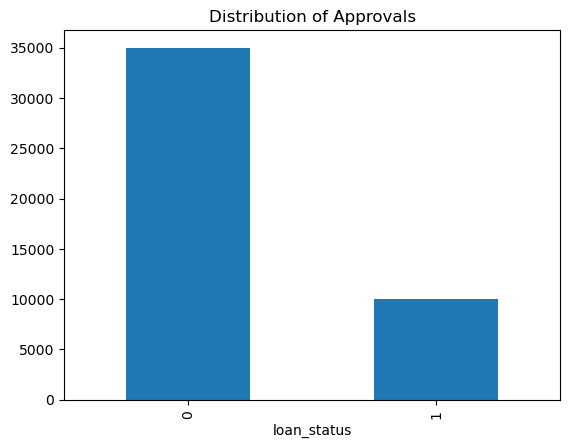

In [77]:
#check distribution of loan approval
loan_df['loan_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Approvals')

## Distribution of Loan Status
### No - 35000
### Yes - 10000

<Axes: xlabel='loan_intent'>

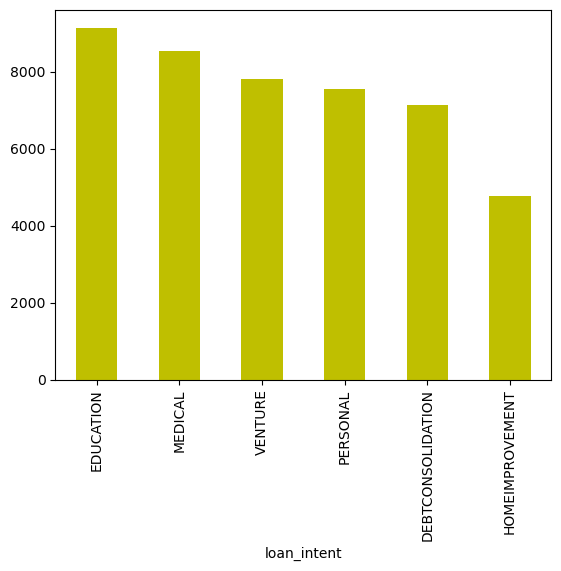

In [78]:
#check distribution of loan intent feature
loan_df['loan_intent'].value_counts().plot(kind='bar',color = 'y')

### Most applicants apply for education or venture loans

In [79]:
#check number of approvals per intent category
intent_df = loan_df[loan_df['loan_status']==1].groupby('loan_intent')['loan_status'].count().reset_index()
intent_df 

,loan_intent,loan_status
0,DEBTCONSOLIDATION,2163
1,EDUCATION,1552
2,HOMEIMPROVEMENT,1258
3,MEDICAL,2378
4,PERSONAL,1521
5,VENTURE,1128


In [80]:
#check % of approvals per intent category
total_intent = loan_df['loan_intent'].value_counts().reset_index()
intent_df = pd.merge(intent_df,total_intent, how = 'inner', on = 'loan_intent')
intent_df['%Approvals'] = intent_df['loan_status']*100/intent_df['count']
intent_df

,loan_intent,loan_status,count,%Approvals
0,DEBTCONSOLIDATION,2163,7145,30.272918
1,EDUCATION,1552,9153,16.956189
2,HOMEIMPROVEMENT,1258,4783,26.301484
3,MEDICAL,2378,8548,27.819373
4,PERSONAL,1521,7552,20.140360
5,VENTURE,1128,7819,14.426397


### We can see highest number of approvals for debt consolidations purposes followed by loans for medical purposes.
### Least approval rates are for venture purposes followed by education loans.

/var/folders/v9/vhgfpqqn68d5z4pqh22hxlf40000gn/T/ipykernel_17045/2249769751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'loan_intent', y = '%Approvals', data = intent_df.sort_values(by = '%Approvals',ascending=False), palette = 'coolwarm')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'DEBTCONSOLIDATION'),
  Text(1, 0, 'MEDICAL'),
  Text(2, 0, 'HOMEIMPROVEMENT'),
  Text(3, 0, 'PERSONAL'),
  Text(4, 0, 'EDUCATION'),
  Text(5, 0, 'VENTURE')])

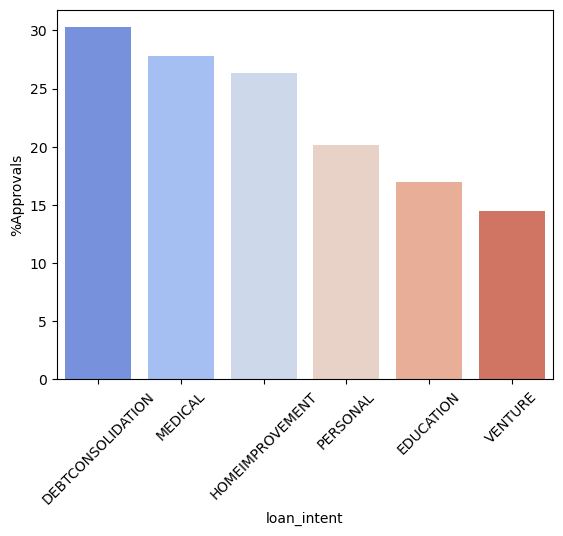

In [81]:
#plot %approvals
sns.barplot(x = 'loan_intent', y = '%Approvals', data = intent_df.sort_values(by = '%Approvals',ascending=False), palette = 'coolwarm')
plt.xticks(rotation = 45)

<Axes: xlabel='person_education'>

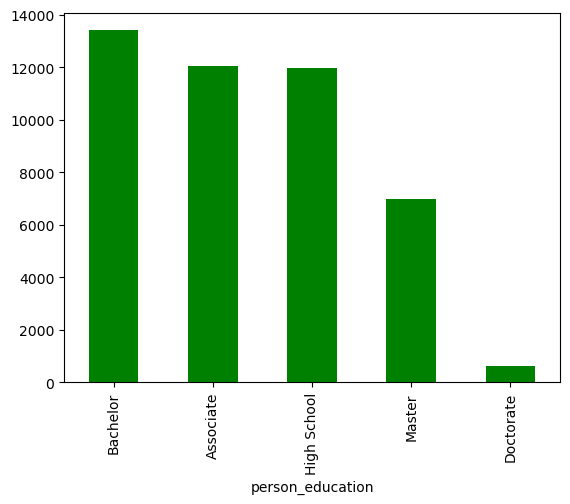

In [82]:
#check distribution of education column
loan_df['person_education'].value_counts().plot(kind='bar', color = 'g')

### Education background of most applications range from a High School qualification to a Bachelors Degree.

In [83]:
#check % of approvals per education category
total_education = loan_df['person_education'].value_counts().reset_index()
education_df = loan_df[loan_df['loan_status']==1].groupby('person_education')['loan_status'].count().reset_index()
education_df = pd.merge(education_df, total_education, how = 'inner', on = 'person_education')
education_df['%Approvals'] = education_df['loan_status']*100/education_df['count']
education_df

,person_education,loan_status,count,%Approvals
0,Associate,2650,12028,22.031926
1,Bachelor,3018,13399,22.524069
2,Doctorate,142,621,22.866345
3,High School,2671,11972,22.310391
4,Master,1519,6980,21.762178


### Educational Qualifications do not act as a separator when it comes to approvals with similar approval rates across all categories.

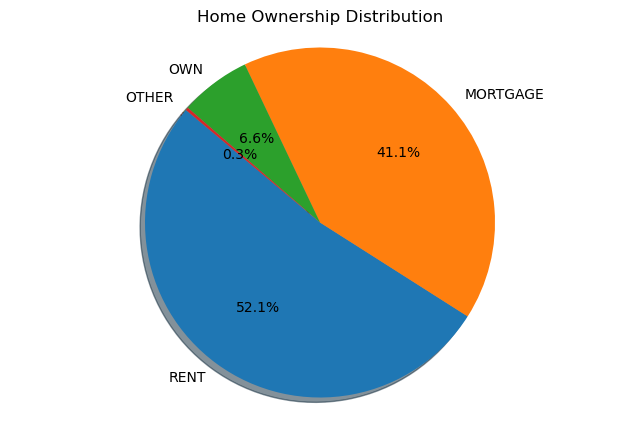

In [84]:
#check distribution of home ownerships 
plt.figure(figsize=(8, 5))
plt.pie(
    loan_df['person_home_ownership'].value_counts(),
    labels=loan_df['person_home_ownership'].value_counts().index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)

plt.title('Home Ownership Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

### Most applications either have a rented home or one on Mortgage.

In [85]:
#check % of loan approvals based on home ownership
total_ownership = loan_df["person_home_ownership"].value_counts().reset_index()
ownership_df = loan_df[loan_df['loan_status']==1].groupby('person_home_ownership')['loan_status'].count().reset_index()
ownership_df = pd.merge(ownership_df, total_ownership, how = 'inner', on = 'person_home_ownership')
ownership_df['%Approvals'] = ownership_df['loan_status']*100/ownership_df['count']
ownership_df


,person_home_ownership,loan_status,count,%Approvals
0,MORTGAGE,2144,18489,11.596084
1,OTHER,39,117,33.333333
2,OWN,222,2951,7.522874
3,RENT,7595,23443,32.397731


### The approvals rates for those on rented homes are the highest and lowest for those who own houses.

/var/folders/v9/vhgfpqqn68d5z4pqh22hxlf40000gn/T/ipykernel_17045/1111320851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'person_home_ownership', y = '%Approvals', data = ownership_df.sort_values(by = '%Approvals', ascending=False), palette = 'viridis')


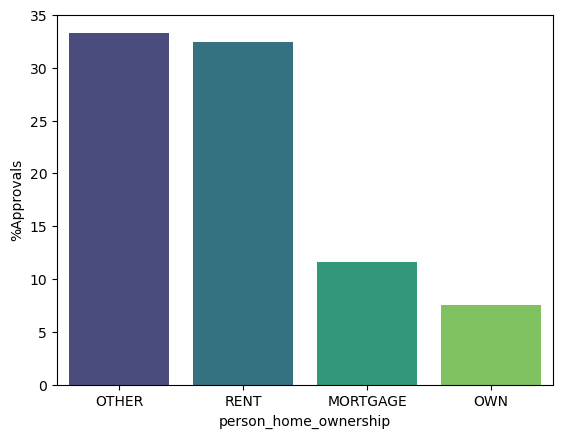

In [86]:
#plot %approvals based on home ownership
sns.barplot(x = 'person_home_ownership', y = '%Approvals', data = ownership_df.sort_values(by = '%Approvals', ascending=False), palette = 'viridis')
plt.show()

In [87]:
#check approvals based on gender
total_gender = loan_df['person_gender'].value_counts()
gender_df = loan_df[loan_df['loan_status']==1].groupby('person_gender')['loan_status'].count().reset_index()
gender_df = pd.merge(gender_df, total_gender, how = 'inner', on = 'person_gender')
gender_df['%Approvals'] = gender_df['loan_status']*100/gender_df['count']
gender_df

,person_gender,loan_status,count,%Approvals
0,female,4485,20159,22.248127
1,male,5515,24841,22.201200


### Approval rates do not vary significantly based on gender.

In [88]:
#check approvals based on previous defaults
total_defaults = loan_df['previous_loan_defaults_on_file'].value_counts()
defaults_df = loan_df[loan_df['loan_status']==1].groupby('previous_loan_defaults_on_file')['loan_status'].count().reset_index()
defaults_df = pd.merge(defaults_df, total_defaults, how = 'inner', on = 'previous_loan_defaults_on_file')
defaults_df['%Approvals'] = defaults_df['loan_status']*100/defaults_df['count']
defaults_df

,previous_loan_defaults_on_file,loan_status,count,%Approvals
0,No,10000,22142,45.163039


### People who have defaulted on their loan earlier are sure to be denied (100 % rejection based on the data)

<Axes: >

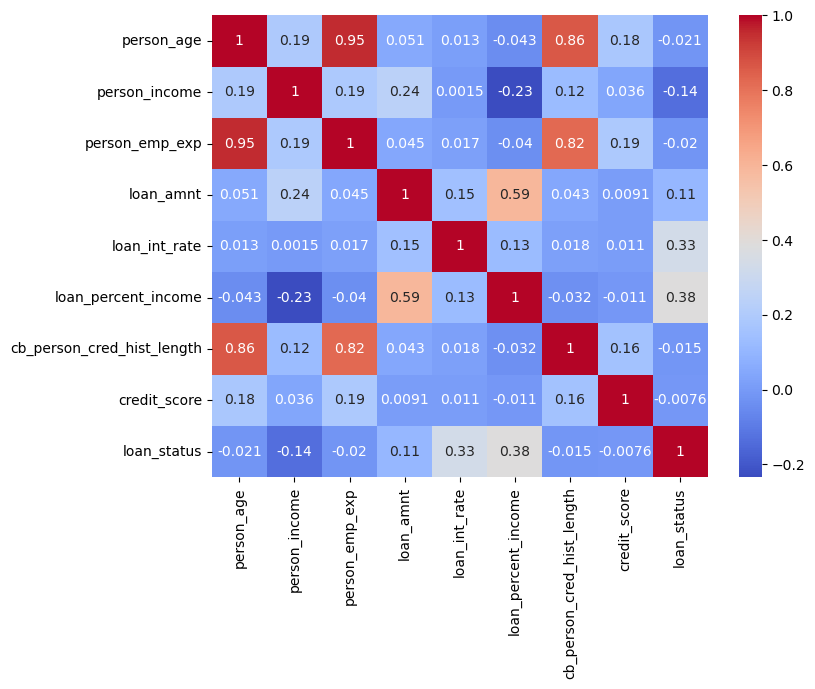

In [89]:
#check correlation of numericals cols with target variable
plt.figure(figsize=(8, 6))
sns.heatmap(loan_df.select_dtypes(include=['number']).corr(), annot=True, cmap = 'coolwarm')


### Age based columns (person_age, person_emp_exp and cb_person_cred_hist_length) show high correlation (multicollinearity)

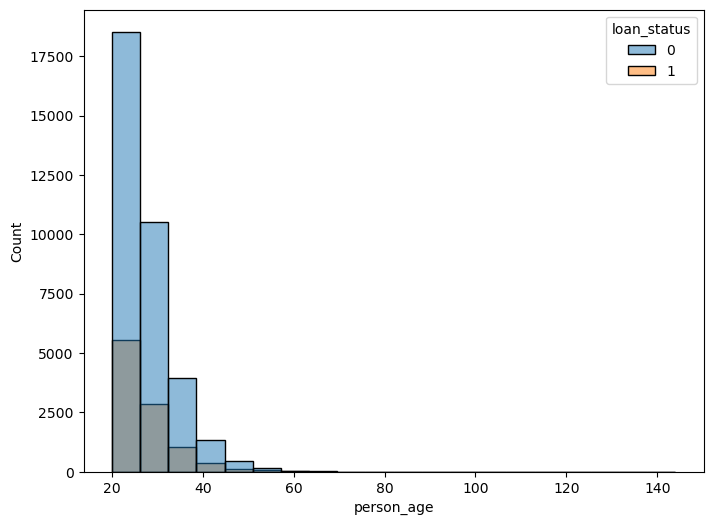

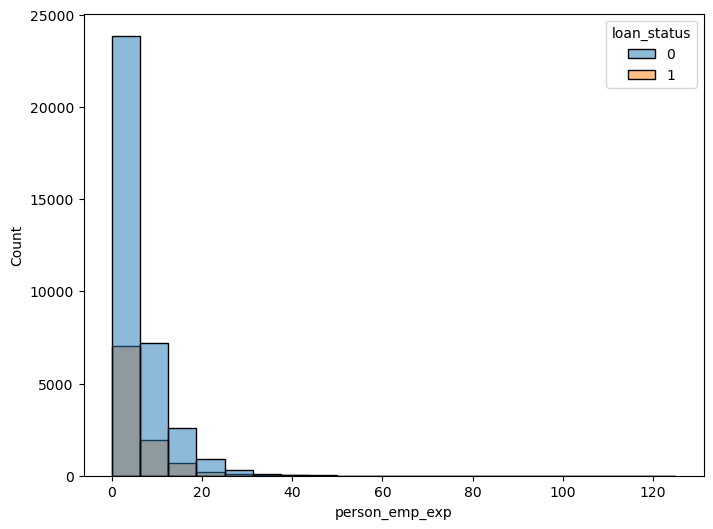

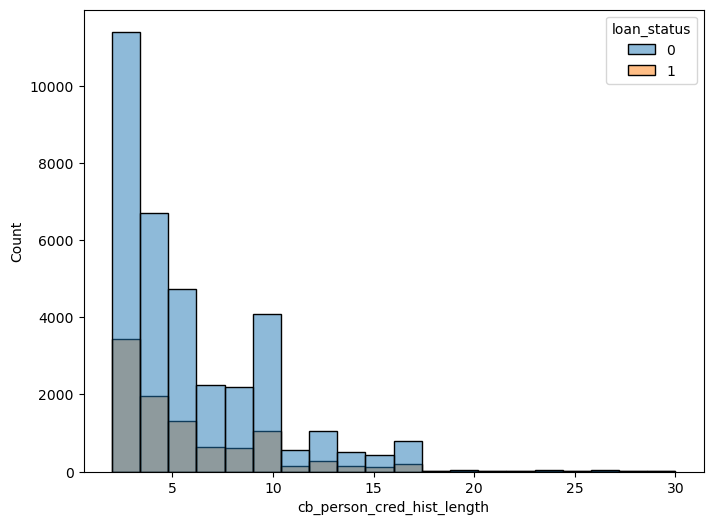

In [90]:
#analyze impact of age, experience and cred history length on loan approvals
age_based_cols = ['person_age','person_emp_exp','cb_person_cred_hist_length']
for i in age_based_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(x = i, hue= 'loan_status', data = loan_df, bins = 20)

### From the 3 histograms above based on age based columns, it can be concluded that approval rates show a downward trend as age goes up, similar trend is also found in employment exp and cred history length columns.

In [91]:
#drop age and exp columns
loan_df.drop(columns=['person_age', 'person_emp_exp'], inplace=True)
loan_df.head()

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,female,Master,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,female,High School,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,female,High School,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,female,Bachelor,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,male,Master,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### we have dropped person_age and emp_exp column to resolve multicollinearity
### credit history length is retained as it gives a good indication of age and also appropriate for credit scoring tasks

In [92]:
#analysis based on credit score
loan_df['credit_score'].describe()

count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64

In [93]:
# Define bins and labels
bins = [0, 580, 670, 740, 800, 900]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Create a new column
loan_df['credit_score_range'] = pd.cut(loan_df['credit_score'], bins=bins, labels=labels)
loan_df.head()


,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,credit_score_range
0,female,Master,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,Poor
1,female,High School,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,Poor
2,female,High School,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,Fair
3,female,Bachelor,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,Good
4,male,Master,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,Fair


In [94]:
#calculate %approvals based on every credit score range
approval_rates = loan_df.groupby('credit_score_range')['loan_status'].mean().reset_index()
approval_rates.columns = ['Credit Score Range', 'Approval Rate']
approval_rates


/var/folders/v9/vhgfpqqn68d5z4pqh22hxlf40000gn/T/ipykernel_17045/2392315740.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rates = loan_df.groupby('credit_score_range')['loan_status'].mean().reset_index()


,Credit Score Range,Approval Rate
0,Poor,0.223070
1,Fair,0.224511
2,Good,0.216117
3,Very Good,0.211765
4,Excellent,0.000000


In [95]:
loan_df[loan_df['credit_score_range'] == 'Excellent']

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,credit_score_range
183,male,Associate,241424.0,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0,Excellent
575,female,High School,97140.0,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0,Excellent
32297,female,Associate,7200766.0,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0,Excellent


### We see similar approval rates across all credit score ranges.
### Since, there are only 3 applicants in the excellent range (800-900), it would be inappropriate to comment on the 0 approval rate, we will need more data in this range to draw conclusions.

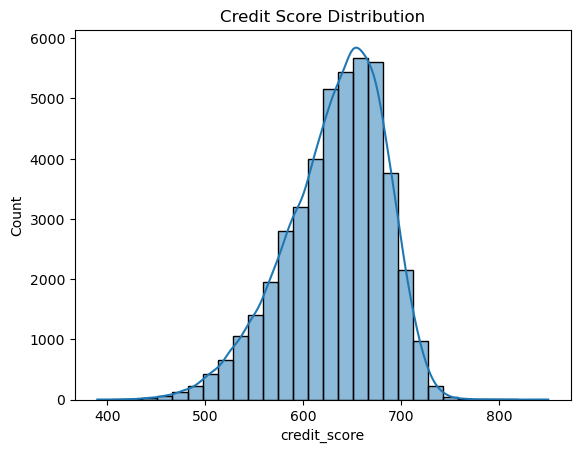

In [96]:
#distribution of credit scores
sns.histplot(loan_df['credit_score'], bins=30, kde=True)
plt.title("Credit Score Distribution")
plt.show()


### Credit Scores show a normal distribution with majority of people in the (630-650) bracket.

/var/folders/v9/vhgfpqqn68d5z4pqh22hxlf40000gn/T/ipykernel_17045/1501923039.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_quantile = loan_df.groupby('credit_score_quantile')['loan_status'].mean().reset_index()


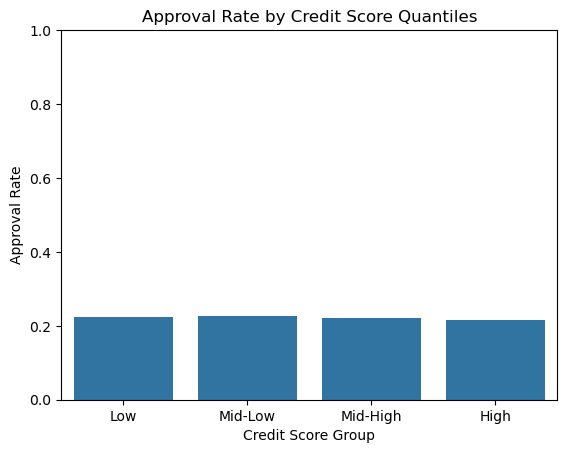

In [97]:
#check approvals by quantiles
loan_df['credit_score_quantile'] = pd.qcut(loan_df['credit_score'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
approval_by_quantile = loan_df.groupby('credit_score_quantile')['loan_status'].mean().reset_index()
approval_by_quantile.columns = ['Credit Score Quantile', 'Approval Rate']

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Credit Score Quantile', y='Approval Rate', data=approval_by_quantile)
plt.title('Approval Rate by Credit Score Quantiles')
plt.ylim(0, 1)
plt.ylabel('Approval Rate')
plt.xlabel('Credit Score Group')
plt.show()


### The approval rates stay consistent across all categories even if the buckets are made on quantiles (equal number of applicants across all buckets).
### We can also conclude that credit score alone is not a strong predictor in this case.

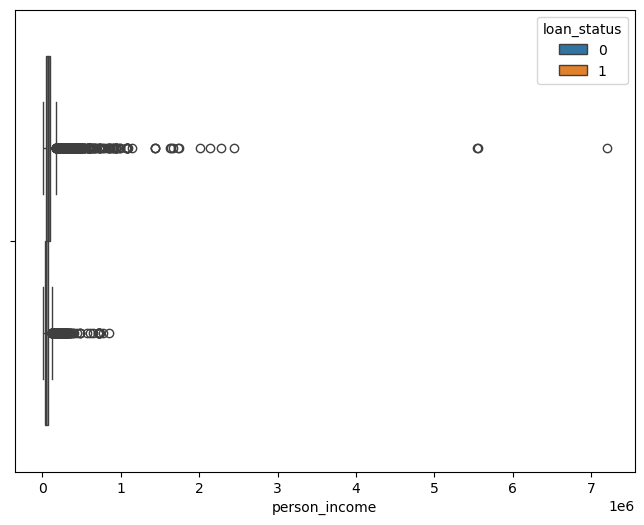

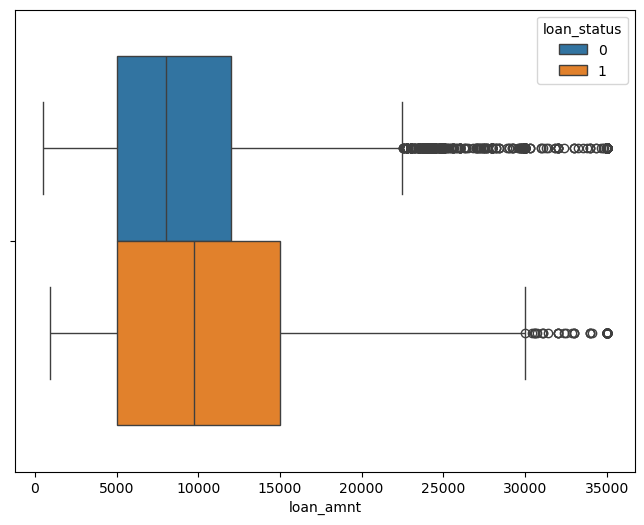

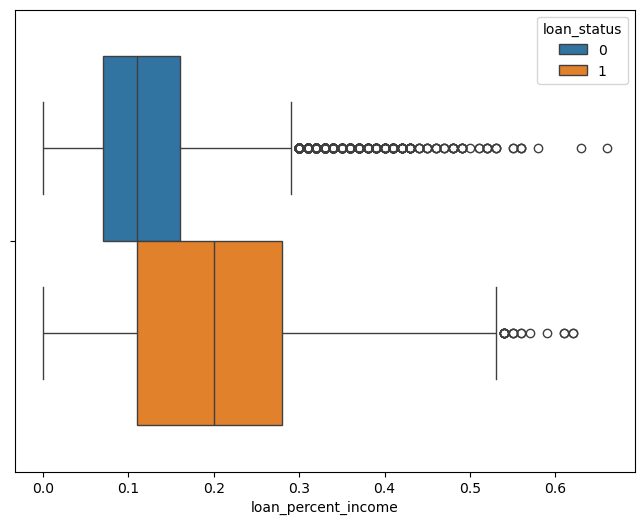

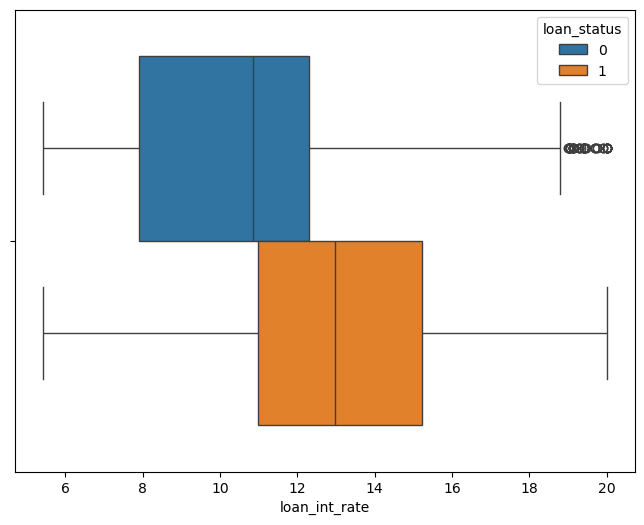

In [98]:
#analyze income based columns
income_cols = ['person_income','loan_amnt','loan_percent_income','loan_int_rate']
for i in income_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x = i, hue = 'loan_status', data = loan_df)

### We see there is a slight difference in the medians of the approved loan amounts and denied loan amounts.
### However, loan_percent_income and loan_int_rate columns show a clear separation between both classes with higher loan percent incomes and higher interest rates being approved for loans in general.

In [99]:
#check for outliers in person income column
loan_df['person_income'].describe()

count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64

<Axes: xlabel='person_income'>

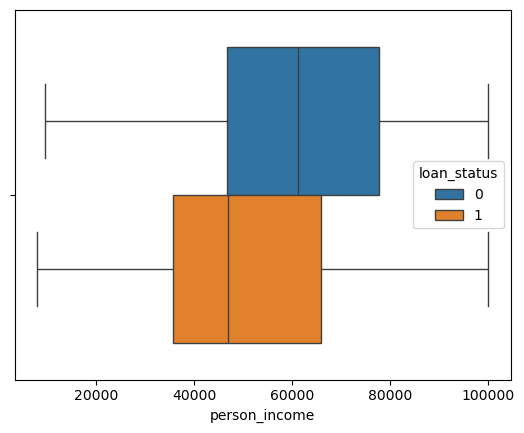

In [100]:
#check approvals for income less than 100k
sns.boxplot(x = 'person_income', hue = 'loan_status', data = loan_df[loan_df['person_income'] < 1e+05])

### Upon only considering salaries till 100k, we can see that approvals tend to be likely in lower income ranges.

In [101]:
loan_df.head()

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,credit_score_range,credit_score_quantile
0,female,Master,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,Poor,Low
1,female,High School,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,Poor,Low
2,female,High School,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,Fair,Mid-Low
3,female,Bachelor,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,Good,High
4,male,Master,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,Fair,Low


In [102]:
#drop credit score range and quantile columns
loan_df.drop(['credit_score_range','credit_score_quantile'],axis = 1, inplace = True)
loan_df.head()

,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,female,Master,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,female,High School,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,female,High School,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,female,Bachelor,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,male,Master,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [103]:
#apply one-hot encoding to categorical columns
loan_df = pd.get_dummies(loan_df,drop_first=True).astype(int)
loan_df.head()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_education_Bachelor,person_education_Doctorate,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,71948,35000,16,0,3,561,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,12282,1000,11,0,2,504,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,12438,5500,12,0,3,635,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,79753,35000,15,0,2,675,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,66135,35000,14,0,4,586,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0


### Dropping columns based on credit score buckets and one-hot encode categorical columns

In [104]:
#write data for training
loan_df.to_csv('loan_data_logistic.csv', index=False)
